In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


### Acknowlegment:

This following series of notebooks use directly the datasets and logic provided by Johannes Mauritzen on his github page (https://jmaurit.github.io/). I follow his methods closely. The series of lectures, which inspired my notebooks use the R language, so I instead adapted his methodology into Python myself. This acknolegments page applies to all subsequent notebooks on this repository. The choice of `.ipynb` felt more natural and easier than an Object Oriented approach, as the latter is not necessary here. 

## Time Series, Power Markets and Renewables

### Primer on the Nordic Electricity Market

#### Deregulation

### Energy Markets and Time Series

### Distributed Lag Models 

y-variable (endogenous variable) is modelled on an x-variable and its lags.
$$
y_t = \alpha + \delta_{0} x_{t} + \delta_{1} x_{t-1} + \delta_{2} x_{t-2}
+ u $$
#### Temporary shocks
Next, we'd like to analyse how a *temporary* "shock" to the system, e.g. how a sudden increase in the oil price might impact profitability over time.

The shock happens at time $t$. In previous time periods, the x-variable (oil price) is constant at $x=c$.

**Before the oil price shock,**
$$
y_{t-1} = \alpha_0 + \delta_{0} c + \delta_{1} c + \delta_{2} c.
$$

**In period $t$, we have,**
$$
y_t = \alpha_0 + \delta_0 (c+1) + \delta_{1} c + \delta_{2} c,
$$
where the shock causes the constant oil price $c$ to increase by $1$.

And so on,

$$
y_{t+1} = \alpha_0 + \delta_0 c + \delta_1 (c + 1) + \delta_2 c,
$$

$$
y_{t+2} = \alpha_0 + \delta_0 c + \delta_1 c + \delta_2 (c + 1),
$$

$$
y_{t+3} = \alpha_0 + \delta_0 c + \delta_1 c + \delta_2 c.
$$

We can look at the effect of the shock over time, which is called the **impact propensity**:

| Time | Impact Propensity                |
|------|----------------------------------|
| $ t $   | $ y_t - y_{t-1} = \delta_0 $         |
| $ t+1 $ | $ y_{t+1} - y_{t-1} = \delta_1 $     |
| $ t+2 $ | $ y_{t+2} - y_{t-1} = \delta_2 $     |
| $ t+3 $ | $ y_{t+3} - y_{t-1} = 0 $           |

By time $t+3$, the impact propensity drops to zero, suggesting that the shock's effect has fully dissipated by this point because the model only looks at 2 periods.

#### Permanent shocks

An example of a permanent shock to a variable, such as a C02 tax on electricity prices. 

At period $t$, we have
$$
y_t = \alpha_0 + \delta_0 (c+1) + \delta_{1} c + \delta_{2} c,
$$
as before. 

In the following year, the permanent shock remains giving us,
$$
y_{t+1} = \alpha_0 + \delta_0 (c + 1) + \delta_1 (c + 1) + \delta_2 c,
$$

$$
y_{t+2} = \alpha_0 + \delta_0 (c + 1) + \delta_1 (c + 1) + \delta_2 (c + 1),
$$

$$
y_{t+3} = \alpha_0 + \delta_0 (c + 1) + \delta_1 (c + 1) + \delta_2 (c + 1).
$$

This is what we call **“long-run propensity”**, or the **permanent effect**:

| Time   | Long-Run Propensity                              |
|--------|--------------------------------------------------|
| $ t $     | $ y_t - y_{t-1} = \delta_0 $                      |
| $ t+1 $   | $ y_{t+1} - y_{t-1} = \delta_0 + \delta_1 $      |
| $ t+2 $   | $ y_{t+2} - y_{t-1} = \delta_0 + \delta_1 + \delta_2 $ |
| $ t+3 $   | $ y_{t+3} - y_{t-1} = \delta_0 + \delta_1 + \delta_2 $ |

At $t$, the shock is introduced.

In subsequent periods, the shock remains at the elevated level. 

### Serial correlation

There can be correlation over time between the different error terms. Without serial correlation, the residuals of a regression should be normally distributed around 0.

#### Log Transformation

- Log transforming the data can make it more linear

**Example:** analysis of effects of wind power (W) on prices (P). These series are expressed in different units so we can log transform the regression,

$$
\log(P_t) = \alpha_0 + \delta_0 \cdot \log(W_t) + \delta_1 \cdot \log(W_{t-1}) + \delta_2 \cdot \log(W_{t-2}).
$$

$\delta_0$ is interpreted as a **short-term elasticity**,
$$
\delta_0 = \frac{\% \Delta P_t}{\% \Delta W_t}.
$$

The **long-term elasticity** would be
$$
\delta_0 + \delta_1 + \delta_2.
$$

**Remember:** To log-transform a variable, all values in a series **MUST** be **positive** and **non-zero**.

#### Dummy variables in time series regression

For example, if we'd like to estimate the effect of a new environmental rule on oil production, we may perform the following regression:

$$
Q_t = \beta X_t + \delta D_t + u_t
$$

Where $ D_t = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1] $, with the 1’s signifying the periods after the new rule was put in place.

**Interpretation:**

- **$ \beta $**: Measures the effect of the independent variable $ X_t $ on the dependent variable $ Q_t $.
- **$ \delta $**: Captures the change in $ Q_t $ attributable to the implementation of the new rule (i.e., the shift from 0 to 1 in $ D_t $).

#### Trends

We might need to model a trend in the data (like an upward trending mean part). 

Expressing the linear trend as,
$$
y_t = \alpha + \beta t + u_t
$$

This is simulated in the following code cell using Python

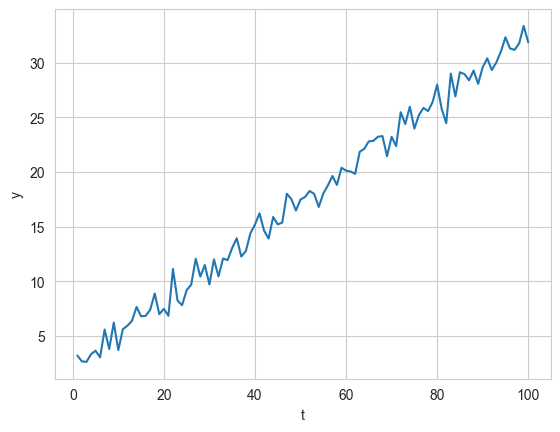

In [149]:
u_t = np.random.randn(100)
alpha=2.5
beta=.3
t=np.linspace(1,100,100)
y = alpha + beta*t + u_t
plt.figure()
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

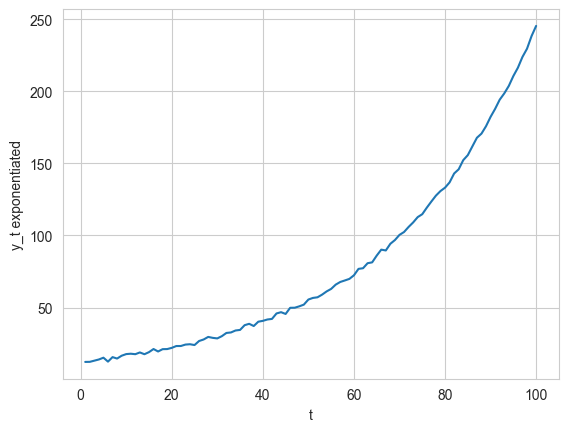

In [150]:
u_t = np.random.randn(100)
alpha=2.5
beta=.03  # modified beta value here, series increases 3% per period 
t=np.linspace(1,100,100)
y_t = np.exp(alpha + beta*t) + u_t
plt.figure()
plt.plot(t, y_t)
plt.xlabel('t')
plt.ylabel('y_t exponentiated')
plt.show()

The term $e^{\alpha + \Beta t}$ grows exponentially over time

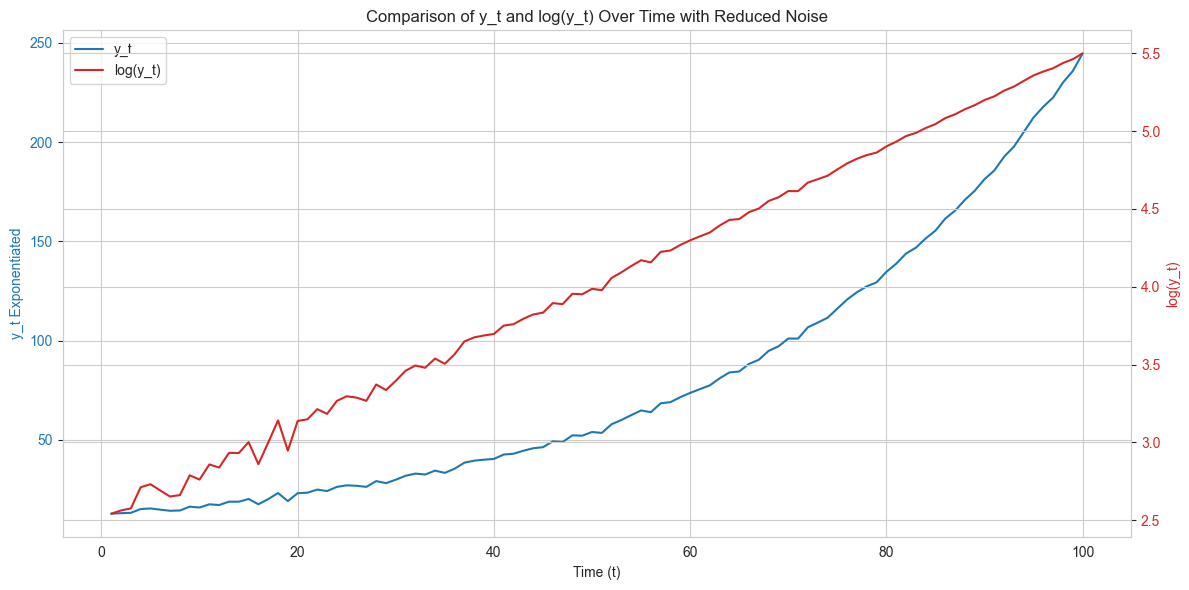

In [151]:
u_t = np.random.randn(100)
alpha=2.5
beta=.03  # modified beta value here, series increases 3% per period 
t=np.linspace(1,100,100)
y_t = np.exp(alpha + beta*t) + u_t
# Create Figure and Dual Y-Axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot y_t on the First Y-Axis
color_y = 'tab:blue'
ax1.set_xlabel('Time (t)')
ax1.set_ylabel('y_t Exponentiated', color=color_y)
ax1.plot(t, y_t, color=color_y, label='y_t')
ax1.tick_params(axis='y', labelcolor=color_y)

# Create a Second Y-Axis Sharing the Same X-Axis
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis

# Plot log(y_t) on the Second Y-Axis
color_logy = 'tab:red'
ax2.set_ylabel('log(y_t)', color=color_logy)  # We already handled the x-label with ax1
ax2.plot(t, np.log(y_t), color=color_logy, label='log(y_t)')
ax2.tick_params(axis='y', labelcolor=color_logy)

# Add Title and Legends
plt.title('Comparison of y_t and log(y_t) Over Time with Reduced Noise')

# Combine Legends from Both Axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Show Plot
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

$$
\log{y_t} \approx \alpha + \beta t
$$

by taking the logarithm of the exponential growth model, the relationship becomes linear.

## Time Series in Python

Wind production data from Sweden and Denmark

In [152]:
wind_prod = pd.read_csv("dk_se_wind_data.csv")

Price of power on the day-ahead market (units= EUR/MWH)

In [153]:
elspot = pd.read_csv("elspot.csv")

Start by looking at the two prices in Denmark: DK1 and DK2. This has been explained earlier. The Danish market is split into two zones or areas where a uniform electricity price is established for each hour of the day. This is the "zonal" market. The other type of market is the "Nodal" market, which allows the price to vary at a much finer level depending on the state of the transmission and the marginal generation costs at a location (node). This type of market naturally becomes more complex and less transparent. Within electricity market research, exploring which system is best in different scenarios is a major topic of research. Mette Bjørndal at NHH has written extensively on this.

The main market run by NordPool is the day-ahead market. Suppliers submit supply schedules (how much they are willing to produce and for how much for each hour of the following day.)

Wholesale consumers submit demand schedules - saying how much they want to buy at given prices for each hour of the following day. 

In [154]:
elspot.columns

Index(['Bergen', 'DK1', 'DK2', 'EE', 'ELE', 'FI', 'FRE', 'KT', 'Kristiansand',
       'LT', 'LV', 'Molde', 'Oslo', 'SE', 'SE1', 'SE2', 'SE3', 'SE4', 'SYS',
       'Trondheim', 'Tromsoe', 'date'],
      dtype='object')

| **Column Name** | **Region/Country** | **Description**                                         | **Significance**                                                                 |
|-----------------|--------------------|---------------------------------------------------------|-----------------------------------------------------------------------------------|
| **Bergen**      | Norway             | Bergen bidding zone                                     | Regional electricity pricing in Bergen, Norway.                                   |
| **DK1**         | Denmark            | Denmark's electricity price area 1                      | Regional market in western Denmark.                                               |
| **DK2**         | Denmark            | Denmark's electricity price area 2                      | Regional market in eastern Denmark.                                               |
| **EE**          | Estonia            | Estonia's electricity market                            | Electricity pricing within Estonia.                                               |
| **ELE**         | Estonia/Latvia     | Elspot area code for Estland Latvian export area         | Facilitates cross-border trading and export of electricity from Estonia to Latvia within the Nord Pool market. |
| **FI**          | Finland            | Finland's electricity market                            | Overall electricity prices in Finland.                                            |
| **FRE**         | Finland/Russia     | FI/RU electricity exchange area                         | Used for cross-border trading and congestion management for transmission capacity allocated for 'direct trade' between Finland and Russia. Both import and export through 'direct trade' are handled using the 'FRE' area. |
| **KT**          | Denmark/Europe     | Konti-Skan bidding area                                  | Provides geographic access to the Vattenfall Europe Transmission control area from East Denmark (DK2). Opened in 2005 to allow Nord Pool to compete with the European Energy Exchange (EEX). Facilitates cross-border trading and congestion management within the Nord Pool market. |
| **Kristiansand**| Norway             | Kristiansand bidding zone                               | Regional electricity pricing in Kristiansand, Norway.                             |
| **LT**          | Lithuania          | Lithuania's electricity market                          | Electricity pricing within Lithuania.                                            |
| **LV**          | Latvia             | Latvia's electricity market                             | Electricity pricing within Latvia.                                               |
| **Molde**       | Norway             | Molde bidding zone                                      | Regional electricity pricing in Molde, Norway.                                    |
| **Oslo**        | Norway             | Oslo bidding zone                                       | Regional electricity pricing in Oslo, Norway.                                     |
| **SE**          | Sweden             | Sweden's overall electricity market                     | Aggregated electricity prices across Sweden.                                     |
| **SE1**         | Sweden             | Sweden's electricity price area 1                        | Regional market 1 in Sweden.                                                      |
| **SE2**         | Sweden             | Sweden's electricity price area 2                        | Regional market 2 in Sweden.                                                      |
| **SE3**         | Sweden             | Sweden's electricity price area 3                        | Regional market 3 in Sweden.                                                      |
| **SE4**         | Sweden             | Sweden's electricity price area 4                        | Regional market 4 in Sweden.                                                      |
| **SYS**         | System-wide        | System-wide electricity price (SMP)                      | Aggregated electricity price across the entire system or interconnected markets.  |
| **Trondheim**   | Norway             | Trondheim bidding zone                                  | Regional electricity pricing in Trondheim, Norway.                                |
| **Tromsoe**     | Norway             | Tromsø bidding zone                                      | Regional electricity pricing in Tromsø, Norway.                                   |
| **date**        | -                  | Date of observation                                     | Time period for each data point, enabling time-series analysis.                  |


We only select Denmark's two regions and join with wind date by Danish-only wind production data

In [155]:
DK = elspot[['DK1', 'DK2', 'date']].rename(columns={'DK1': 'DK1price', 'DK2': 'DK2price'}).merge(wind_prod[['DK1', 'DK2', 'date']].rename(columns={'DK1': 'DK1wind', 'DK2': 'DK2wind'}), left_on='date', right_on='date')

In [156]:
DK.head()

,DK1price,DK2price,date,DK1wind,DK2wind
0,4077,4089.0,2013-01-01,20882,11388
1,3940,4020.0,2013-02-01,9254,5969
2,4033,4158.0,2013-03-01,13550,6160
3,4282,4355.0,2013-04-01,4965,2115
4,3682,3740.0,2013-05-01,7106,991


`date` column appears to be of `str` format, convert to Year-Month

In [157]:
DK['date'] = pd.to_datetime(DK['date']).dt.strftime('%Y-%m')

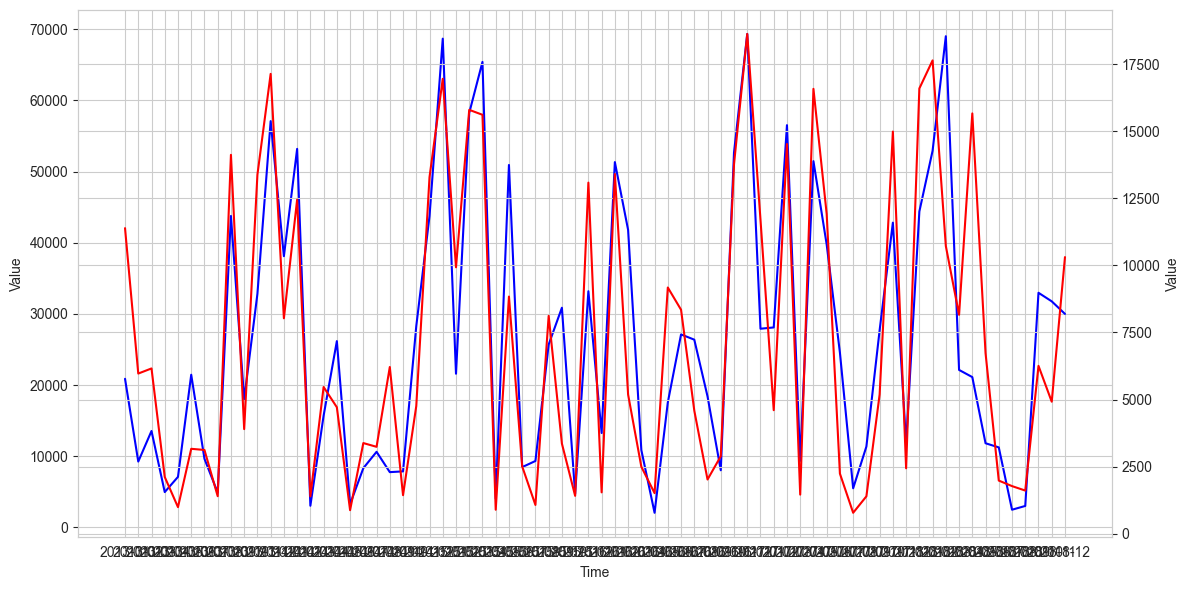

In [158]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.plot(DK['date'], DK['DK1wind'], color='blue', label='DK1wind')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel('Value')
ax2.plot(DK['date'], DK['DK2wind'], color='red', label=('DK2wind'))
ax2.tick_params(axis=('y'))
plt.tight_layout()
plt.show()

This way of plotting is better for variables with different units or orders of magnitudes. Visualise using `seaborne` method `sns.lineplot` instead by creating a `melt()` DataFrame

In [159]:
DK_long

,date,variable,value
0,2013-01,DK1wind,20882
1,2013-02,DK1wind,9254
2,2013-03,DK1wind,13550
3,2013-04,DK1wind,4965
4,2013-05,DK1wind,7106
...,...,...,...
139,2018-08,DK2wind,1775
140,2018-09,DK2wind,1609
141,2018-10,DK2wind,6256
142,2018-11,DK2wind,4920


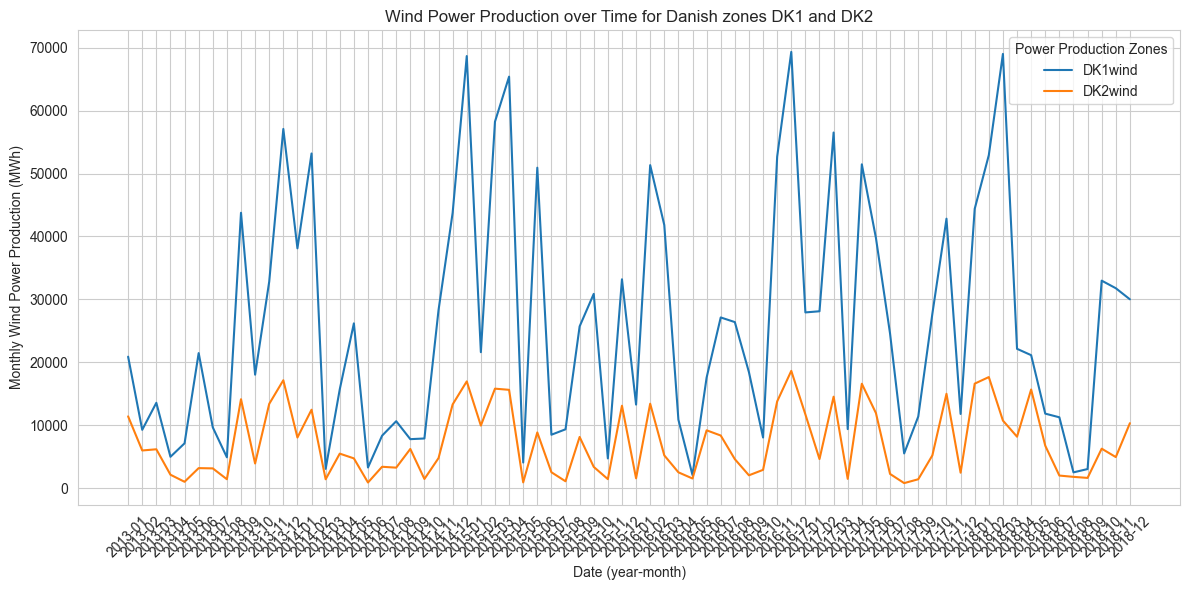

In [160]:
DK_long = DK[['DK1wind', 'DK2wind', 'date']].melt(id_vars='date',
                                                  value_vars=['DK1wind', 'DK2wind'],
                                                  var_name='variable',
                                                  value_name='value')


sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=DK_long, x='date', y='value', hue='variable')
plt.xlabel('Date (year-month)')
plt.ylabel('Monthly Wind Power Production (MWh)')
plt.title("Wind Power Production over Time for Danish zones DK1 and DK2")
plt.xticks(rotation=45)
plt.legend(title='Power Production Zones')
plt.tight_layout()
plt.show()

This is monthly aggregated data ranging from Jan 2013 to Dec 2018. Monthly aggregation is unusual, given that data tends to be hourly in the day-ahead market. Even on a monthly basis, wind production is highly variable. It is clear that wind production in the DK1 zone is much higher than in the DK2 zone on average. When wind production is low for both zones, then the values for both zones will be very similar or almost equal, the closer the production is to zero. Without any calculation, it is clear that the two time series are highly correlated. 

DK1 zone is the Western peninsula of Denmark, sharing a border with Germany. There is more land in this part of Denmark, thus more space, and easier access to mainland Germany, which has strong industrial base. The wind is also strong according to Lab 4 (Johannes Mauritzen), so this area has most of the wind power capacity. However, the Western part of Denmark is less populated than the Eastern part, where Copenhagen lies (I have actually spent around two months in Denmark and used to drive from West to East every weekend to explore Copenhagen, taking the bridge or the ferry). 

Let's plot prices in both zones

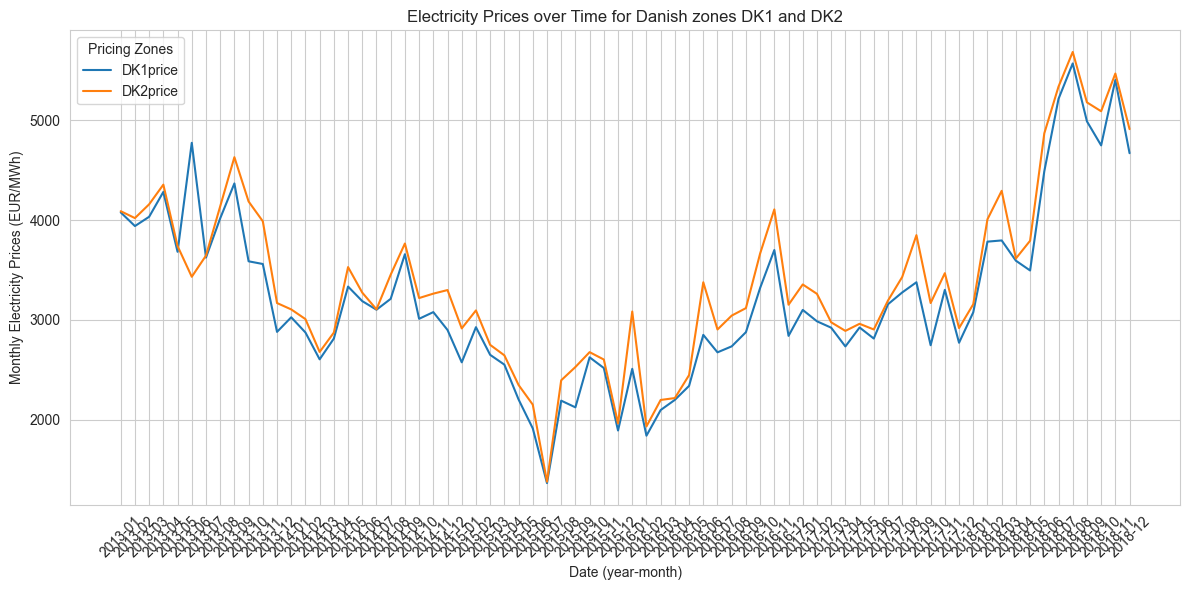

In [161]:
DK_long = DK[['DK1price', 'DK2price', 'date']].melt(id_vars='date',
                                                    value_vars=['DK1price', 'DK2price'],
                                                    var_name='variable',
                                                    value_name='value')

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=DK_long, x='date', y='value', hue='variable')
plt.xlabel('Date (year-month)')
plt.ylabel('Monthly Electricity Prices (EUR/MWh)')
plt.title("Electricity Prices over Time for Danish zones DK1 and DK2")
plt.xticks(rotation=45)
plt.legend(title='Pricing Zones')
plt.tight_layout()
plt.show()


The prices in both zones tend to be highly correlated and about the same. Prices in the DK2 region are consistently slightly more expensive than in DK1. 

Let's study how wind power and price correlation looks like in both areas.

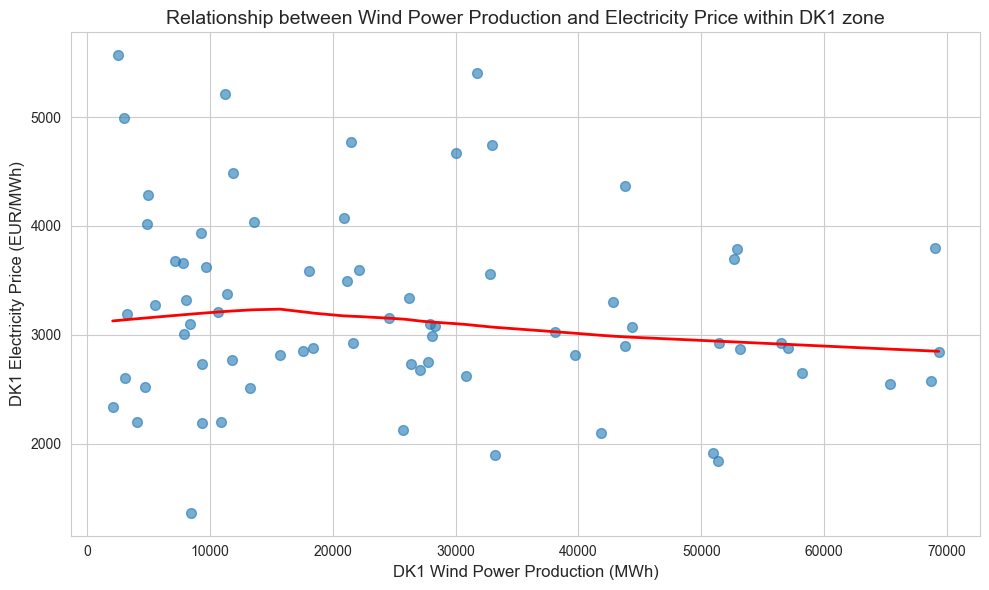

In [162]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

sns.regplot(
    data=DK,
    x='DK1wind',
    y='DK1price',
    scatter=True,
    fit_reg=True,
    lowess=True,
    line_kws={'color': 'red', 'lw': 2},
    scatter_kws={'s': 50, 'alpha': 0.6}
)
plt.xlabel('DK1 Wind Power Production (MWh)', fontsize=12)
plt.ylabel('DK1 Electricity Price (EUR/MWh)', fontsize=12)
plt.title('Relationship between Wind Power Production and Electricity Price within DK1 zone', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

We can see that there is a slight negative relationship between Wind Production and Electricity Prices. The more power is produced by wind, the cheaper prices appear to be. This makes sense as more supply lowers the price everything else being constant. The same plot is done for the DK2 zone.

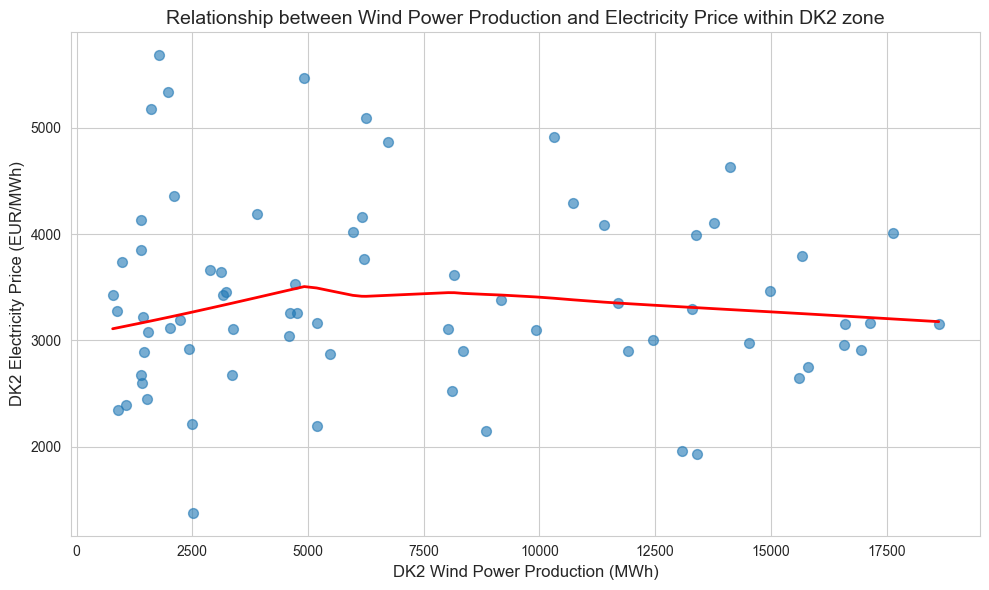

In [163]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

sns.regplot(
    data=DK,
    x='DK2wind',
    y='DK2price',
    scatter=True,
    fit_reg=True,
    lowess=True,
    line_kws={'color': 'red', 'lw': 2},
    scatter_kws={'s': 50, 'alpha': 0.6}
)
plt.xlabel('DK2 Wind Power Production (MWh)', fontsize=12)
plt.ylabel('DK2 Electricity Price (EUR/MWh)', fontsize=12)
plt.title('Relationship between Wind Power Production and Electricity Price within DK2 zone', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

Not much of a trend here but slightly cheaper electricity prices during months of high wind production. 

We instead focus on DK1 and run a simple linear regression using OLS.

In [164]:
X = DK.dropna(subset=['DK2price', 'DK1wind', 'DK2wind'])[['DK2price', 'DK1wind', 'DK2wind']]
X = sm.add_constant(X)
y = DK.dropna(subset=['DK2price', 'DK1wind', 'DK2wind'])['DK1price']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               DK1price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     306.0
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           2.10e-39
Time:                        20:51:15   Log-Likelihood:                -492.67
No. Observations:                  72   AIC:                             993.3
Df Residuals:                      68   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0895    123.769      0.114      0.9

`DK2price` is a strong predictor of `DK1price`. It appears as though wind power generation in either region is not a predictor of prices.

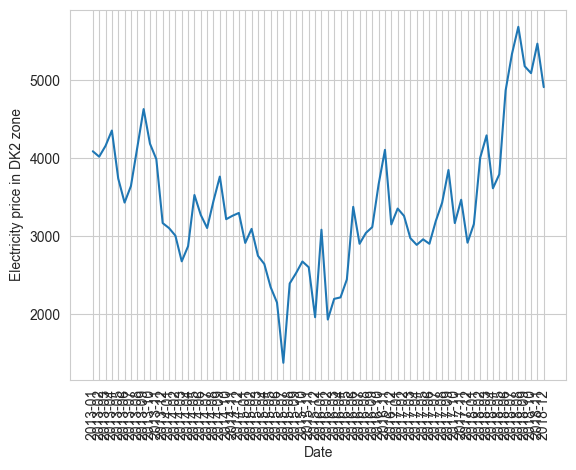

In [165]:
plt.figure()
plt.plot(DK['date'], DK['DK2price'])
plt.xlabel('Date')
plt.ylabel('Electricity price in DK2 zone')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


**Things to consider about the regression we just performed**
- It seems as though DK1 and DK2 prices are not stationary (as we can see in the line plot above). In this case, the time series should be differentiated once, checked for stationarity, and differentiated until integrated series becomes stationary.
- including DK2 prices as a predictor for DK1price is likely not a useful model. DK1 and DK2 are co-determined at the same time in the market. 
- We have not accounted for some dynamics in the time series, such as autocorrelation in the price series.
- The data may be too aggregated, a finer time scale may be preferrable


We  create a once-differentiated DataFrame of `DK`

In [166]:
DK

,DK1price,DK2price,date,DK1wind,DK2wind
0,4077,4089.0,2013-01,20882,11388
1,3940,4020.0,2013-02,9254,5969
2,4033,4158.0,2013-03,13550,6160
3,4282,4355.0,2013-04,4965,2115
4,3682,3740.0,2013-05,7106,991
...,...,...,...,...,...
67,5569,5684.0,2018-08,2489,1775
68,4989,5179.0,2018-09,3017,1609
69,4748,5090.0,2018-10,32970,6256
70,5404,5468.0,2018-11,31766,4920


In [167]:
DK_diff = pd.DataFrame()
DK_diff['date'] = DK['date']
DK_diff['DK1price_diff'] = DK['DK1price'].diff()
DK_diff['DK2price_diff'] = DK['DK2price'].diff()
DK_diff['DK1wind_diff'] = DK['DK1wind'].diff()
DK_diff['DK2wind_diff'] = DK['DK2wind'].diff()

# drop the first row
DK_diff = DK_diff.dropna().reset_index(drop=True)


Plot the first difference of DK1 price

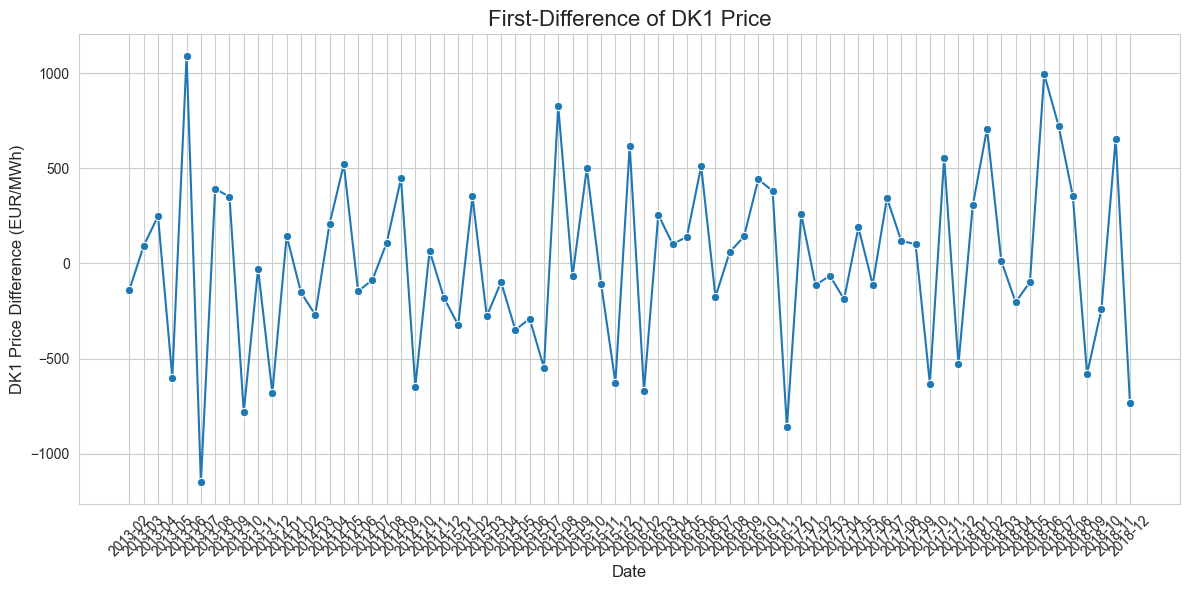

In [168]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.lineplot(data=DK_diff, x='date', y='DK1price_diff', marker='o')

# Customize the plot
plt.title('First-Difference of DK1 Price', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('DK1 Price Difference (EUR/MWh)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

This already looks more stationary, as the mean, variance and autocorrelation appear to be constant over time


In [169]:
import statsmodels.formula.api as smf

Let's create some lagged variables

In [170]:
DK_diff['DK1wind_diff_l1'] = DK_diff['DK1wind_diff'].shift(1)

# remove the row containing the NaN value in the lagged variable column
DK_diff = DK_diff.dropna(subset=['DK1wind_diff_l1']).reset_index(drop=True)

A simple lag model is run. The change in price `DK1price_diff` is a linear function of the wind power and the lagged wind power (lagged by a month)

In [171]:
X = DK_diff[['DK1wind_diff', 'DK1wind_diff_l1']]
X = sm.add_constant(X)

y = DK_diff['DK1price_diff']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          DK1price_diff   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.2788
Date:                Mon, 30 Dec 2024   Prob (F-statistic):              0.758
Time:                        20:51:24   Log-Likelihood:                -528.30
No. Observations:                  70   AIC:                             1063.
Df Residuals:                      67   BIC:                             1069.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              10.8296     56.038     

No effect of wind power and lagged wind power on the electricity price. It is important to keep in mind that the data is aggregated monthly, meaning that there are not enough data points to draw any meaningful conclusions. Because the data is too aggregagted, we instead analyse hourly data.

We use hourly data from NordPool provided by Johannes Mauritzen. Since then, Nord Pool has changed its data access policies and no longer provides open access to their historical data. Most of the data on prices and generation is accessible through the European regulator ENTSOE-E

#### Hourly data and stationarity

In [172]:
wt_data = pd.read_csv("wt_data2.csv")

Reminding ourselves of the original quesiton: **How does wind power affect prices in the Nord Pool market?**

In [173]:
DK_hr = (
    wt_data
    .filter(['time', 'hour', 'wind_DK1', 'wind_DK2', 'DK1EurMW', 'DK2EurMW'])
    .assign(time=lambda df: pd.to_datetime(df['time']))
    .set_index('time')
)

Plot DK1 wind production over time

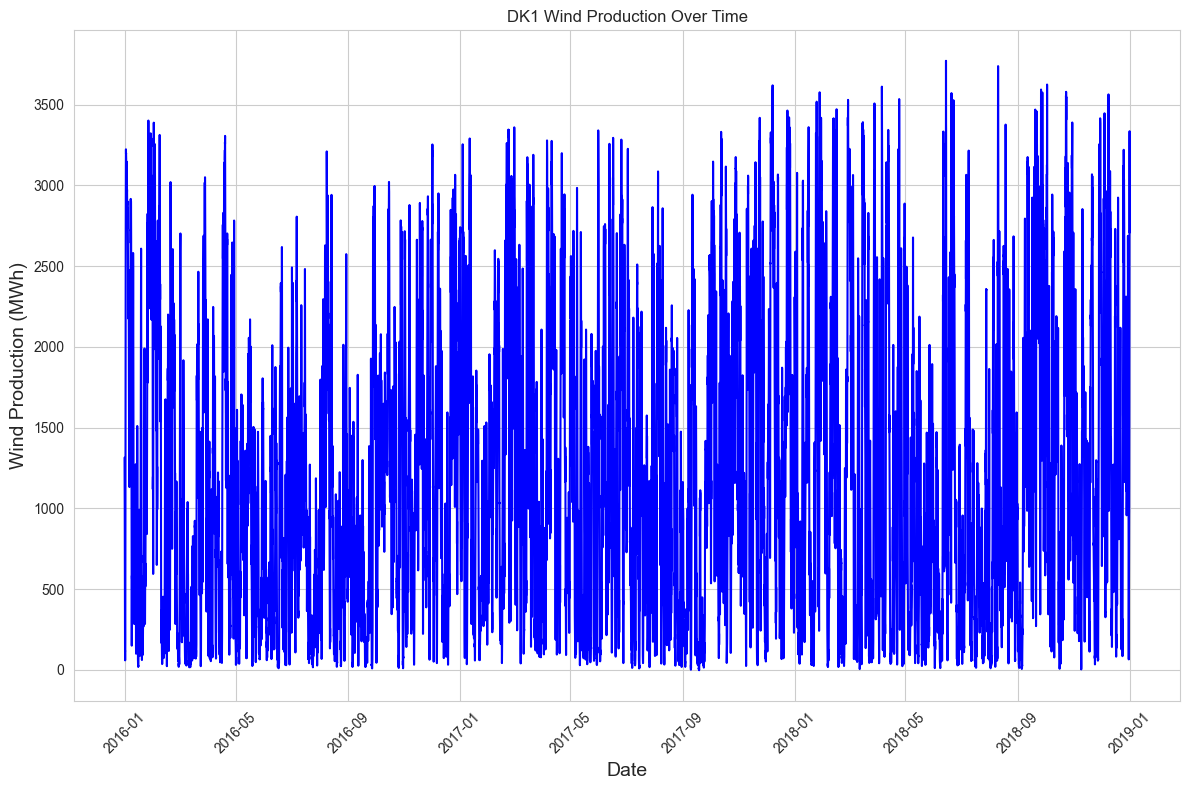

In [174]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.lineplot(data=DK_hr, x='time', y='wind_DK1', color='blue')
plt.title("DK1 Wind Production Over Time", fontsize=12)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Wind Production (MWh)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots

# Show the plot
plt.show()

This time series appears to be quite stationary. Perform tests later to confirm this is the case.

Plot DK1 electricity price in EUR/MWh over time

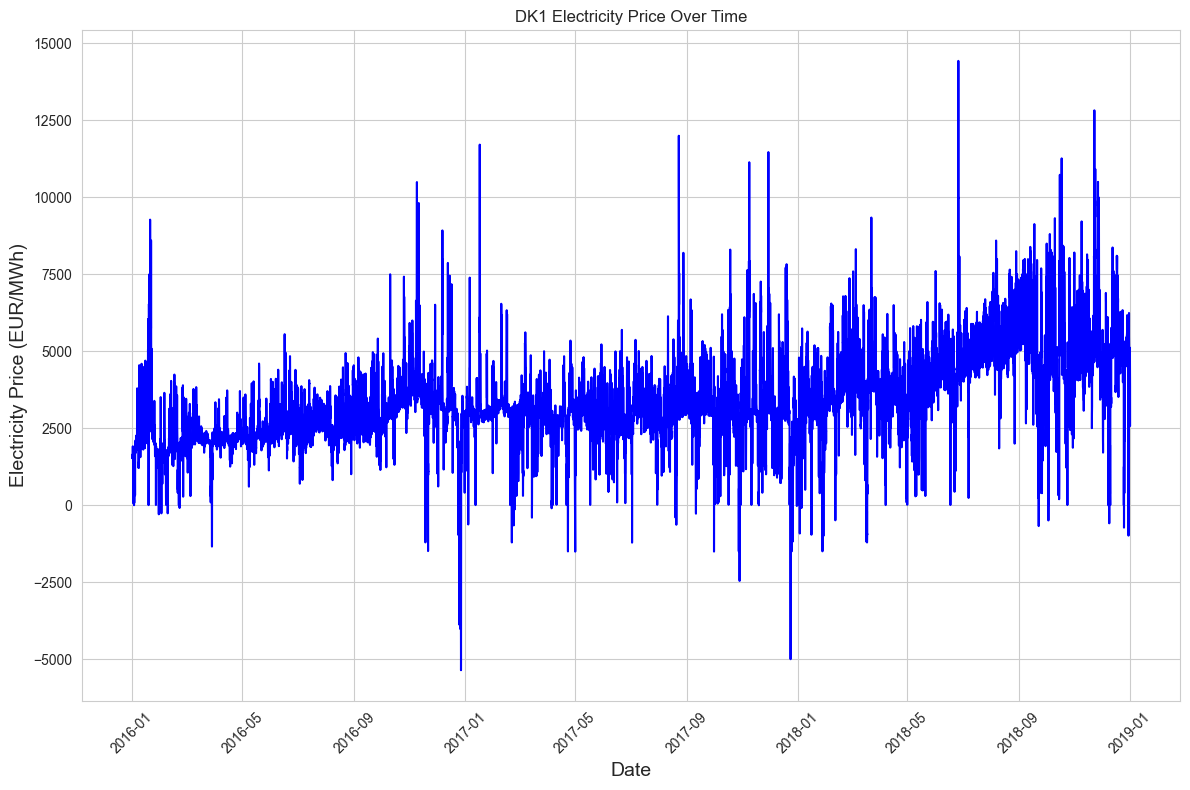

In [175]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.lineplot(data=DK_hr, x='time', y='DK1EurMW', color='blue')
plt.title("DK1 Electricity Price Over Time", fontsize=12)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Electricity Price (EUR/MWh)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots

# Show the plot
plt.show()

This price series does not look stationary

A dynamic model is created by lagging power production time series by 1, 2 and 3 periods and use those as independent variables in a linear model to predict eletricity prices 

In [176]:
DK_hr_diff = DK_hr.copy()
DK_hr_diff['wind_DK1_l1'] = DK_hr_diff['wind_DK1'].shift(1)
DK_hr_diff['wind_DK1_l2'] = DK_hr_diff['wind_DK1'].shift(2)
DK_hr_diff['wind_DK1_l3'] = DK_hr_diff['wind_DK1'].shift(3)

DK_hr_diff = DK_hr_diff.dropna(subset=['wind_DK1', 'wind_DK1_l1', 'wind_DK1_l2', 'wind_DK1_l3', 'DK1EurMW']).reset_index(drop=True)


In [177]:
X = DK_hr_diff[['wind_DK1', 'wind_DK1_l1', 'wind_DK1_l2', 'wind_DK1_l3']]
y = DK_hr_diff['DK1EurMW']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               DK1EurMW   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     750.9
Date:                Mon, 30 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:51:34   Log-Likelihood:            -2.2670e+05
No. Observations:               26289   AIC:                         4.534e+05
Df Residuals:                   26284   BIC:                         4.534e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3973.3844     13.982    284.181      

- Data is hourly, less aggregated... test hourly wind production effect on hourly prices in the DK1 price region
- also consider impact of wind power 1, 2 and 3 hours before on the hourly price
- For every additional 1 MWh increase in wind power, the electricity price in DK1 zone is expected to decrease by approximately 0.34 EUR/MWh, holding other factors constant
- No lagged effects, contemporaneous effect, wind power output will only affect price in that period, will not have any persistent effect thereafter
- It is unlikely that the price series is truly stationary, so a stationarity test is performed below. 

#### Stationarity and Persistence

A regression of the price series on its own lag is performed, known as an Autoregressive (AR) model

In [178]:
DK_hr_diff = DK_hr.copy()
DK_hr_diff['DK1EurMW_l1'] = DK_hr_diff['DK1EurMW'].shift(1)
DK_hr_diff = DK_hr_diff.dropna().reset_index(drop=True)

In [179]:
X = DK_hr_diff['DK1EurMW_l1']
X = sm.add_constant(X)
y = DK_hr_diff['DK1EurMW']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               DK1EurMW   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 2.857e+05
Date:                Mon, 30 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:51:34   Log-Likelihood:            -1.9566e+05
No. Observations:               26297   AIC:                         3.913e+05
Df Residuals:                   26295   BIC:                         3.913e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         144.7351      6.530     22.164      

The coefficient of the lagged term is close to 1 (0.95). In other terms, a shock that happened to the price of electricity within a certain hour will almost certainly carry over to the next hour. Shocks do not dissipate quickly. This correlation from one hour to the next may imply that the series is non-stationary. This will certainly make the regression (as the one using lagged hourly wind power production as independent variables) difficult to interpret. 

#### Random Walk Review

The simplest form of a persistent and non-stationary time series is the **random walk**. The simple random walk model can be written as,
$$
y_t = y_{t-1} + \epsilon_t
$$

For example, if the oil price was considered to be a random walk, the price today would be equal to today's price plus a random, stochastic jump, positive or negative with equal probability. Therefore, the best forecast for tomorrow's price is simply today's price. 

A random walk can be simulated easily. 

In [180]:
e = np.random.normal(loc=0, scale=1, size=(50,30))
y = np.cumsum(e, axis=0)
y_df = pd.DataFrame(y, columns=[f'y{s+1}' for s in range(30)])
print(y_df.head())

         y1        y2        y3        y4        y5        y6        y7  \
0 -1.774224 -1.201377  1.096257  0.861037 -1.520367 -0.447440  0.463487   
1 -1.312618 -2.297731  0.218639  0.451795 -1.725181 -0.290167 -0.513607   
2  0.216396 -1.660238  2.335772  0.949351 -1.956473 -1.236004 -0.843603   
3 -1.430720 -2.349878  4.013841  2.133470 -2.668045  0.518309 -1.561494   
4 -1.297391 -1.836064  3.329020  1.826513 -2.437547  2.441822 -1.032503   

         y8        y9       y10  ...       y21       y22       y23       y24  \
0  0.392493 -1.627167  0.260010  ...  1.583790 -0.536122  0.577150  0.807497   
1  1.187449 -3.484732  0.788711  ...  1.189035 -1.523693  0.645363  2.066198   
2  0.034506 -1.386891  0.771680  ...  0.473097 -2.298043  0.914836  1.067319   
3 -0.788686  0.149027  2.079420  ...  0.285964 -1.339807  1.726061  1.906033   
4 -0.923422 -0.071197  2.823585  ...  2.274239  0.412626  1.118001  0.536814   

        y25       y26       y27       y28       y29       y30  
0  0

This DataFrame is a **wide format**, instead we melt to a **long format**.

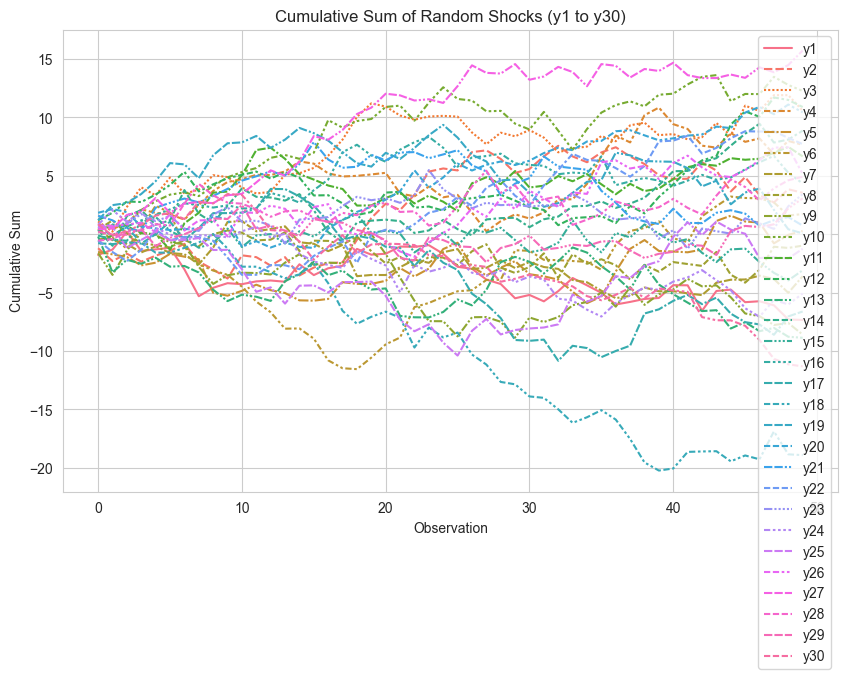

In [181]:
y_df['t'] = np.arange(1, 51)
y_l = y_df.melt(id_vars=['t'], var_name='variable', value_name='value')
plt.figure(figsize=(10,6))
#sns.lineplot(data=y_l, x='t', y='value')
sns.lineplot(data=y_df.iloc[:, :-1])
plt.title('Cumulative Sum of Random Shocks (y1 to y30)')
plt.xlabel('Observation')
plt.ylabel('Cumulative Sum')
plt.show()

30 simulated random walks across 50 periods

As the theory tells us for Brownian Motion, the variance grows linearly with $t$. Stationarity, on the other hand, requires constant variance. Non-constant variance also violates our criteria for using OLS. 

In the non-stationary random walks, the mean is also not well-defined given that the shocks are permanent. There is no reversion to a well-known mean. 

#### Random Walk with Drift

$$
y_t = \alpha_0 + y_{t-1} + \epsilon_t
$$

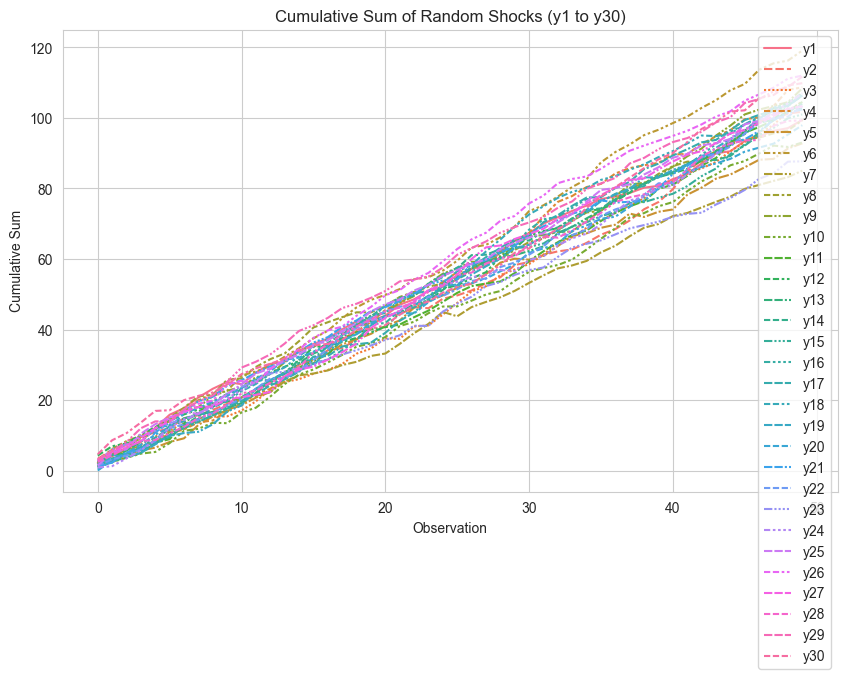

In [182]:
e = np.random.normal(loc=0, scale=1, size=(50,30))
y = np.cumsum(2+e, axis=0)
y_df = pd.DataFrame(y, columns=[f'y{s+1}' for s in range(30)])

y_df['t'] = np.arange(1, 51)
y_l = y_df.melt(id_vars=['t'], var_name='variable', value_name='value')
plt.figure(figsize=(10,6))
#sns.lineplot(data=y_l, x='t', y='value')
sns.lineplot(data=y_df.iloc[:, :-1])
plt.title('Cumulative Sum of Random Shocks (y1 to y30)')
plt.xlabel('Observation')
plt.ylabel('Cumulative Sum')
plt.show()

where we take $\alpha_0 = 2$. The variance still increases over time and there isn't any stable long-term average trend. 

### Stationarity

Covariance stationairty can be defined as,
$$
\mathbb{E}(x_t) constant
\mathbb{V}(x_t) constant
$$

The following are examples of non-stationary time series already discussed beforehand:
- Trending time series (in which a $\alpha_0$ term is added)
- Random walk

Stationarity in time series is important to understand the fundamental behaviour of one or more series together.

#### Conditions for stationarity 

- A normal regression uses random sampling. In other words, the order of the samples in the data do not matter. Predictions on independent variables, which lie within the range of the data can be done.
- On the other hand, a time series is ordered by time so only future predictions can be done. There isn't random sampling. 

A criteria considered is *weak dependence*. 
$$
\mathrm{corr}(x_t, x_{t+h}) \;\to\; 0 \quad \text{as } h \to \infty
$$
The correlation between data goes to zero as time between data points gets large. A shock to the system is not permanent.

#### AR(1) process

The AR(1) process is given by,
$$
y_t = \rho y_{t-1} + \epsilon_t
$$

$\rho = 0.5$ is set.

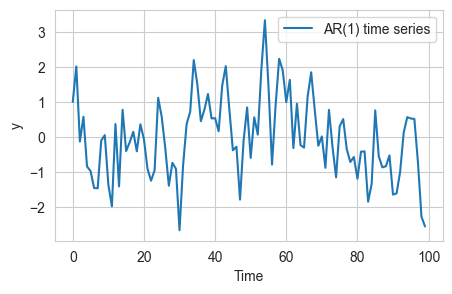

In [183]:
# generate noise for each time step
e_t = np.random.normal(loc=0, scale=1, size=100)
y = np.empty(100)
y[0] = 1.0 # initialise first value
rho = 0.5 # autoregressive parameter

for i in range(1, 100):
    y[i] = rho * y[i-1] + e_t[i]

plt.figure(figsize=(5,3))
plt.plot(y, label="AR(1) time series")
plt.xlabel("Time")
plt.ylabel('y')
plt.legend()
plt.show()


$\rho=1$

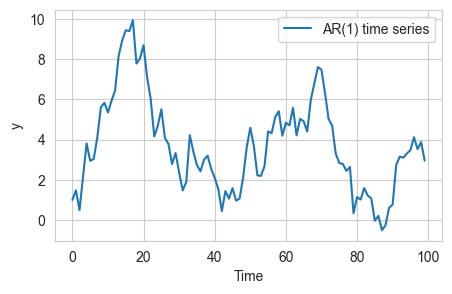

In [184]:
# generate noise for each time step
e_t = np.random.normal(loc=0, scale=1, size=100)
y = np.empty(100)
y[0] = 1.0 # initialise first value
rho = 1 # autoregressive parameter

for i in range(1, 100):
    y[i] = rho * y[i-1] + e_t[i]

plt.figure(figsize=(5,3))
plt.plot(y, label="AR(1) time series")
plt.xlabel("Time")
plt.ylabel('y')
plt.legend()
plt.show()

$\rho=1.05$

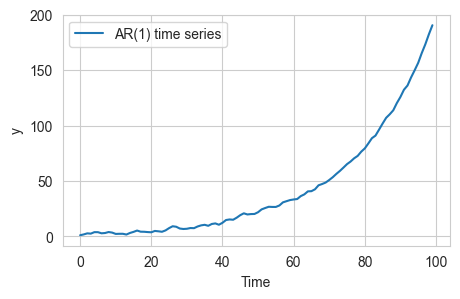

In [185]:
# generate noise for each time step
e_t = np.random.normal(loc=0, scale=1, size=100)
y = np.empty(100)
y[0] = 1.0 # initialise first value
rho = 1.05 # autoregressive parameter

for i in range(1, 100):
    y[i] = rho * y[i-1] + e_t[i]

plt.figure(figsize=(5,3))
plt.plot(y, label="AR(1) time series")
plt.xlabel("Time")
plt.ylabel('y')
plt.legend()
plt.show()

- Value now is the value before summed with a random shock
- $\rho=0.5$ means the value today is half of last value with the random shock. The mean and variance seem stable. 
- $\rho=1$ so value today is yesterday's value plus a random shock. The mean is less clear and may not be constant. 
- For $\rho > 1$, there seems to be a trend and can either explode upward or downward. 

AR(1) series is weakly dependent and stationary when $\left| \rho \right | < 1$

#### Transformation of highly persistent data

A highly persistent time series is often called $I(1)$ i.e. integrated of order one, or a unit-root process.

Instead, an integrated of order $0$: $I(0)$ process is wanted, i.e. a weakly persistent process.

A common strategy to achieve this is by differetiating the $I(1)$ process once, by taking the difference between all consecutive values. 

This is illustrated below, starting with a random walk series.

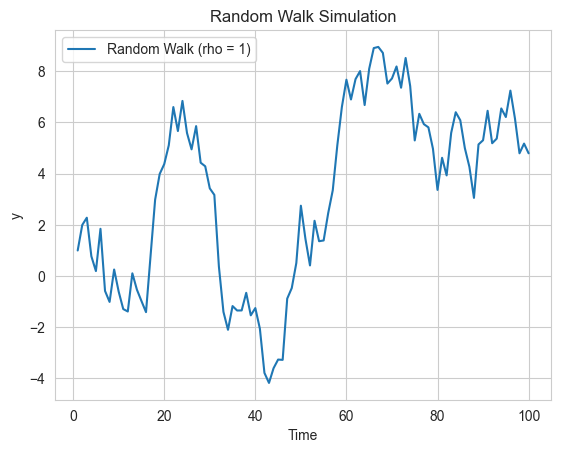

In [186]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

u = np.random.normal(loc=0, scale=1, size=100)

y = np.zeros(100)
y[0] = 1.0  # initial value

rho = 1.0

for t in range(1, 100):
    y[t] = rho * y[t-1] + u[t]
t = np.arange(1, 101)

# 6. Plot
plt.plot(t, y, label="Random Walk (rho = 1)")
plt.xlabel("Time")
plt.ylabel("y")
plt.title("Random Walk Simulation")
plt.legend()
plt.show()


Generated time series is Random Walk = Non-stationary = $I(1)$

Take the first difference using `np.diff()`

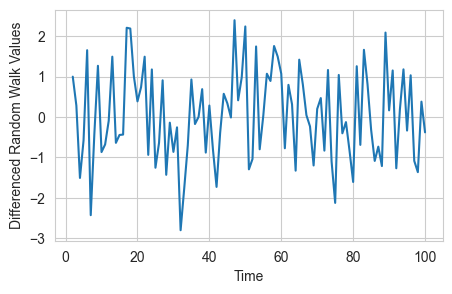

In [187]:
diff_y = np.diff(y)
plt.figure(figsize=(5,3))
plt.plot(t[1:], diff_y)
plt.xlabel('Time')
plt.ylabel("Differenced Random Walk Values")
plt.grid(True)
plt.show()    

This is the series of random shocks, which are centred around zero with std = 1. Stable mean and variance are satisfied when looking at the random draws from a normal distribution. Taking the difference gets us the distribution of the random shocks.

### Spurious regression

Consider two time series, which are random walks,
$$
x_t = x_{t-1} + \epsilon_t,
$$
$$
y_t = y_{t-1} + u_t.
$$

Both series are simulated and a regression is run between the times for each simulation. 


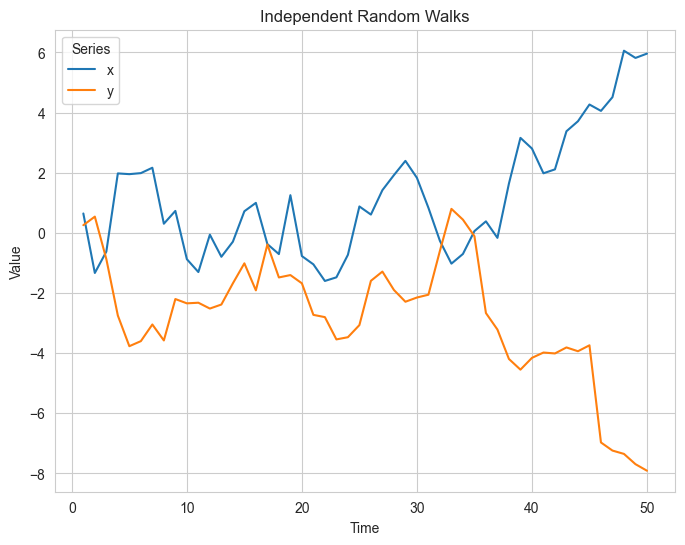

Intercepts: [-1.8816201266824746, 1.2297519615666743, -7.361322940032014, -0.17470572655340927, 5.309970559898323, 2.673227433487807, -0.3876350741300305, -2.912901778900682, -3.4998864032717543, 2.3244692086196137]
Slopes:     [-0.7886846217329502, 1.1138685486104603, 0.7686652809397284, -0.738910776356105, -0.20373053251501438, -0.6754106484160284, -2.2707053828738886, -0.1857037549798183, 0.9370129665470692, -0.02867710514001265]
Mean slope across simulations: -0.20722760259165596
Mean intercept across simulations: -0.4680652885997946


In [188]:
# sample size
N_SIM = 10
n = 50

intercepts= []
slopes=[]

for i in range(N_SIM):
    # generate noise for two independent random walks
    a = np.random.normal(loc=0, scale=1, size=n)
    e = np.random.normal(loc=0, scale=1, size=n)

    # take cumulative sums of noise to create random walks
    x = np.cumsum(a)
    y = np.cumsum(e)

    X = sm.add_constant(x)
    model = sm.OLS(y, X)
    results = model.fit()

    intercepts.append(results.params[0])
    slopes.append(results.params[1])

    if i == 0:
        #  DataFrame
        df = pd.DataFrame({
            't': np.arange(1, n+1),
            'x': x,
            'y': y
        })

        df_melted = df.melt(id_vars='t', value_vars=['x', 'y'],
                    var_name='variable', value_name='value')

        plt.figure(figsize=(8, 6))
        sns.lineplot(data=df_melted, x='t', y='value', hue='variable')
        plt.title("Independent Random Walks")
        plt.xlabel("Time")
        plt.ylabel("Value")
        plt.legend(title="Series")
        plt.show()

print("Intercepts:", intercepts)
print("Slopes:    ", slopes)
print("Mean slope across simulations:", np.mean(slopes))
print("Mean intercept across simulations:", np.mean(intercepts))



The random walks are completely random and independent of one another. They are non-stationary as discussed earlier, i.e. unit-root process $I(1)$.

- Sometimes we get insignificant results, but others we get signficant results (relationship between x and y time series). 
- Some results will be False Positives
- An example: two series that have an upward trend. They're non-stationary. Running regression on one another will give us significant results, but it's wrong. This is a spurious regression.

#### Test for $I(1)$

How to test if series is non-stationary, or integrated of order one? Instead of just guessing visually, a more formal way of testing can be used. 

If series is believed to be AR(1), the following regression can be estimated for this process,
$$
y_t = \rho y_{t-1} + u_t.
$$

Data is simulated and regression is performed.

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.525
Model:                            OLS   Adj. R-squared (uncentered):              0.520
Method:                 Least Squares   F-statistic:                              108.3
Date:                Mon, 30 Dec 2024   Prob (F-statistic):                    1.58e-17
Time:                        20:53:30   Log-Likelihood:                         -140.34
No. Observations:                  99   AIC:                                      282.7
Df Residuals:                      98   BIC:                                      285.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

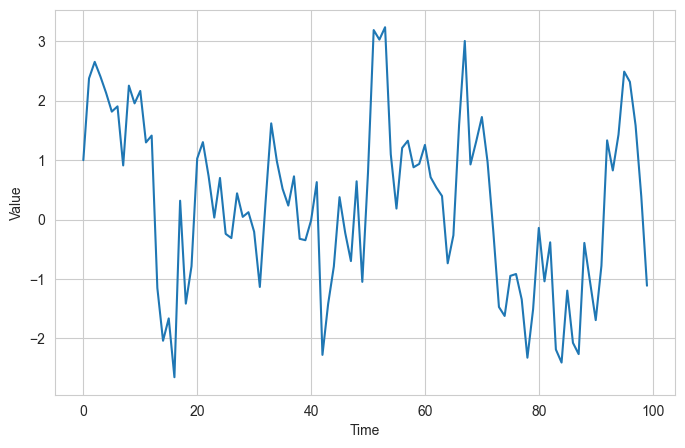

In [189]:
u = np.random.normal(loc=0, scale=1, size=100)

y = np.empty(100)

y[0] = 1.0
rho=0.8

for t in range(1, 100):
    y[t] = rho*y[t-1] + u[t]
#t = np.arange(1, 101)

# regress y_t on y_{t-1}
    
# dependent variable ()
Y = y[1:]

# independent variables (dependent lagged by 1)
X = y[:-1].reshape(-1, 1)

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())


plt.figure(figsize=(8,5))
plt.plot(y, label='I(1) process simulation')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

The true coefficient is $\rho=0.8$. Data was created so that each $y_t$ depends on $0.8 \cdot y_{t-1}$ plus random noise. The Ordinary Least Squares attemps to find the $\rho$ that best fits the data. There is no constant term in the $y_t$ expression, hence no intercept is added in the regression. The regression outputs a coefficient of $0.75$

Try for $\rho=1$

In [190]:
u = np.random.normal(loc=0, scale=1, size=100)

y = np.empty(100)

y[0] = 1.0
rho=1.0

for t in range(1, 100):
    y[t] = rho*y[t-1] + u[t]
#t = np.arange(1, 101)

# regress y_t on y_{t-1}
    
# dependent variable ()
Y = y[1:]

# independent variables (dependent lagged by 1)
X = y[:-1].reshape(-1, 1)

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.750
Method:                 Least Squares   F-statistic:                              297.9
Date:                Mon, 30 Dec 2024   Prob (F-statistic):                    1.80e-31
Time:                        20:53:31   Log-Likelihood:                         -124.33
No. Observations:                  99   AIC:                                      250.7
Df Residuals:                      98   BIC:                                      253.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The results vary around the value of $1$, but they vary quite a lot.

If the series that are regressed are non-stationary, this test for stationarity using a regression is not valid. 

This test for stationarity is only valid if it is already known that the series are stationary (contradiction).

Instead, a similar regression combined with other tests is called the **Dickey-Fuller Test**.

#### Dickey-Fuller Test

For AR(1) model,
$$
y_t = \rho y_{t-1} + u_t,
$$

the Null-Hypothesis is,
$$
H_0 : \rho=1 \text{ is non-stationary}
$$
as opposed to,
$$
H_A : \rho < 1
$$

The AR(1) process is transformed using a difference 
$$
y_t - y{t-1} = \rho y{t-1} + \epsilon_t - y{t-1}
$$

#### Testing for stationarity and transforming in practice

Still using the hourly Denmark power and price data

In [191]:
DK_hr['DK1EurMW'].head()

time
2016-01-01 00:00:00    1639.0
2016-01-01 01:00:00    1604.0
2016-01-01 02:00:00    1574.0
2016-01-01 03:00:00    1557.0
2016-01-01 04:00:00    1547.0
Name: DK1EurMW, dtype: float64

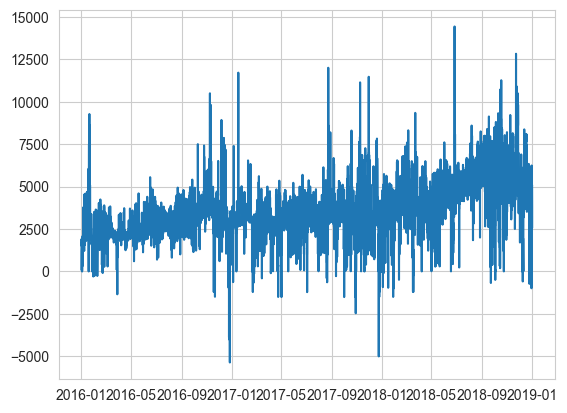

In [192]:
plt.figure()
plt.plot(DK1price)
plt.grid(True)
plt.show()

In [193]:
DK1price = DK_hr['DK1EurMW']
DK1price = DK1price.dropna()
adf_result = adfuller(DK1price)

print("ADF Statistic: ", adf_result[0])
print("p-value:       ", adf_result[1])
print("Used lags:     ", adf_result[2])
print("Number of observations used:", adf_result[3])

# Optional: the ADF function also returns critical values and an IC best fit.
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}, {value}")

ADF Statistic:  -9.710211720280787
p-value:        1.0163155629739554e-16
Used lags:      49
Number of observations used: 26251
Critical Values:
   1%, -3.430599131063867
   5%, -2.861650108618613
   10%, -2.5668286075580147


The p-value is very close to $0$. Null hypothesis is non-stationary and alternative hypothesis is stationary, a low p-value allows to reject the null hypothesis and assume we have a stationary series. We reject the null hypothesis of a unit root (I(1))

### Serial Correlation

If the series is correlated over time, and as long as it stationary, it can be modelled without bias. However, if the serial correlation is not taken into account, it can lead to standard errors not being "efficient" anymore, in other words we can no longer count on Standard Errors being correct. 

#### Testing for Serial Correlation

A simple regression of differenced price on wind power is performed

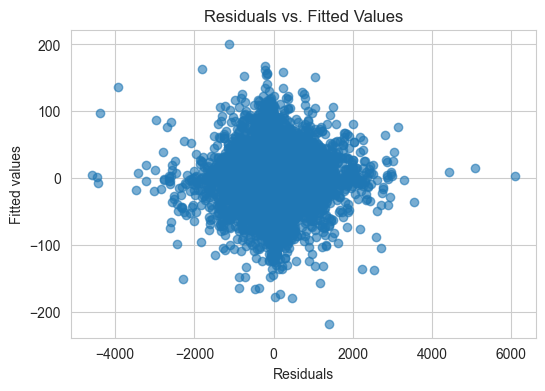

                            OLS Regression Results                            
Dep. Variable:          DK1EurMW_diff   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     122.5
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           2.12e-28
Time:                        20:53:48   Log-Likelihood:            -1.9589e+05
No. Observations:               26297   AIC:                         3.918e+05
Df Residuals:                   26295   BIC:                         3.918e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0409      2.564      0.016

In [194]:
df_diff = pd.DataFrame({
    'DK1EurMW_diff': DK_hr['DK1EurMW'].diff(),
    'wind_DK1_diff': DK_hr['wind_DK1'].diff()
}).dropna()

# 2. OLS regression: diff(DK1EurMW) ~ diff(wind_DK1)
Y = df_diff['DK1EurMW_diff']
X = df_diff['wind_DK1_diff']

# Add constant for the intercept (equivalent to including + 1 in the R formula)
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()

# 3. Extract residuals and fitted values
diffmod2_resid = results.resid
diffmod2_fitted = results.fittedvalues

# 4. Plot: fitted vs. residuals
plt.figure(figsize=(6, 4))
plt.scatter(diffmod2_resid, diffmod2_fitted, alpha=0.6)
plt.xlabel('Residuals')
plt.ylabel('Fitted values')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()

# 5. (Optional) Print regression summary
print(results.summary())

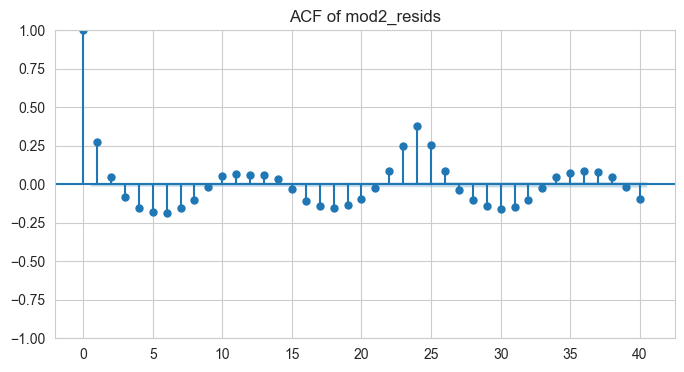

In [195]:
from statsmodels.graphics.tsaplots import plot_acf

# Suppose diffmod2_resid is already a pandas Series of your regression residuals.
# If it's a NumPy array, you can wrap it with pd.Series(...) first.

# 1) Remove NA values
mod2_resids = diffmod2_resid.dropna()

# 2) (Optional) Convert to time series if you want a formal freq/index
#    In Python, we often just keep it as a Series; if you have
#    a date index, you can set it like this:
# mod2_resids.index = pd.date_range(start='2020-01-01', periods=len(mod2_resids), freq='H')
# mod2_resids = mod2_resids.asfreq('H')

# 3) Plot the ACF of the residuals
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(mod2_resids, ax=ax, lags=40, title='ACF of mod2_resids')
plt.show()


### Summary

- Increase in wind power production tends to push down prices because: 

(i) adding supply pushes prices down 

(ii) marginal cost of wind power is close to zero (no fuels, maintenance costs) so wind power is willing to supply power regardless of the price, except during negative prices.

### Additional Questions

#### 1. Net Exchange Time Series

`wt_data` dataset contains information on net-exchange data for different countries and price areas in the Nordic exchange. It indicates how much net import or export a country or area experiences over the course of an hour. Let's consider the net exchange series for DK1 and DK2: `DK1_nx` and `DK2_nx`

/var/folders/g2/l186zykd1g56mc9vp1p2rv280000gn/T/ipykernel_60670/2392892056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nx_df['time'] = pd.to_datetime(nx_df['time'])


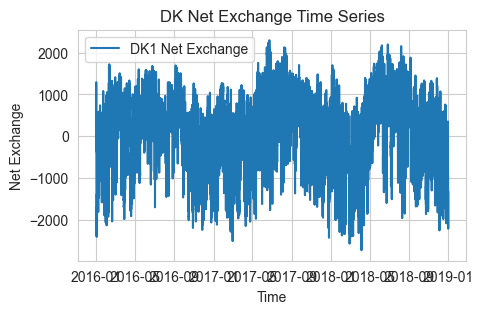

In [196]:
nx_df = wt_data[['time', 'DK1_nx', 'DK2_nx']]
nx_df['time'] = pd.to_datetime(nx_df['time'])
nx_df.set_index('time', inplace=True)
plt.figure(figsize=(5,3))
plt.plot(nx_df['DK1_nx'], label='DK1 Net Exchange')
plt.title('DK Net Exchange Time Series' )
plt.xlabel('Time')
plt.ylabel('Net Exchange')
plt.grid(True)
plt.legend()
plt.show()

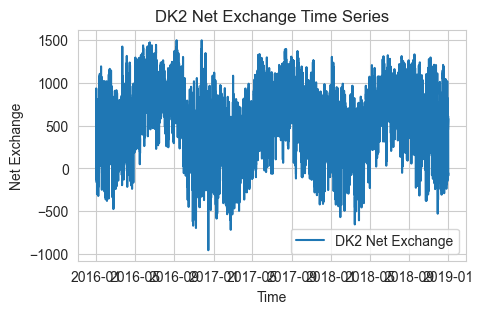

In [197]:
plt.figure(figsize=(5,3))
plt.plot(nx_df['DK2_nx'], label='DK2 Net Exchange')
plt.title('DK2 Net Exchange Time Series' )
plt.xlabel('Time')
plt.ylabel('Net Exchange')
plt.grid(True)
plt.legend()
plt.show()

Because the mean and variance seem to vary repeatedly through different seasons within a single year, it can be said that there is seasonality in the data. Seasonality is a form of non-stationary that can be removed. The presence of a unit-root ($I(1)$) is formally tested using the ADF test.

In [198]:
adf_result = adfuller(nx_df.dropna(subset=['DK1_nx'])['DK1_nx'], autolag='AIC')

print("ADF Statistic: ", adf_result[0])
print("p-value:       ", adf_result[1])
print("Used lags:     ", adf_result[2])
print("Number of observations used:", adf_result[3])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

ADF Statistic:  -13.999479264524542
p-value:        3.885357527932434e-26
Used lags:      48
Number of observations used: 26252
Critical Values:
   1%: -3.4305991215729548
   5%: -2.861650104424084
   10%: -2.5668286053253606


The low p-value allows us to the null hypothesis (non-stationarity) and assume that the Net-Exchange series both DK1 and DK1 regions are stationary. 

#### 2. Does Wind Power Affect Net Exchange?

Predicting Net Exchange (DK1_nx) using wind power and lagged wind power

In [199]:
wt_data_copy = wt_data.copy()
wt_data_copy['wind_DK1_l1'] = wt_data_copy['wind_DK1'].shift(1)
wt_data_copy['wind_DK1_l2'] = wt_data_copy['wind_DK1'].shift(2)
wt_data_copy.dropna(subset=['wind_DK1', 'wind_DK1_l1', 'wind_DK1_l2', 'DK1_nx'], inplace=True)

X = wt_data_copy[['wind_DK1','wind_DK1_l1', 'wind_DK1_l2']]
y = wt_data_copy['DK1_nx']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 DK1_nx   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 2.303e+04
Date:                Mon, 30 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:54:03   Log-Likelihood:            -1.9767e+05
No. Observations:               26293   AIC:                         3.954e+05
Df Residuals:                   26289   BIC:                         3.954e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1037.3065      4.601    225.458      

- Distributed lag model: including wind power and two lags in our model 
- Net-exchange series has been shown to be weakly dependent, $I(0)$, or stationary. The wind power time series is also weakly dependent.
- Should we include any other controlling variables? e.g. prices or wind power in other areas? Wind power series is mostly a function of how windy it is. Wind power will also determine price, so it is best to not include price in the regression, to avoid multicollinearity. 
- In the net-export series, negative values represent net *exports* from the DK1 region.
- As a result, an extra 1 MWh of wind power will lead to 0.85 MWh of exports as found from the coefficients.
- There are no lagged effects as the p-values associated with the lagged wind power are not significant.
- Denmark exports quite a lot of wind power at the margin. This is consistent with the finding that Denmark exported $3.66B in electricity in 2022, making it the world's 13th largest exporter of electricity, according to the OEC website. 

#### 3. Check Residuals for Serial Correlation (looking at ACF and pACF figures)

If there is serial correlation, dynamics should probably be modelled directly in the model, by including autoregressive (AR) terms in the model. 

Still predicting Net Exchange for DK1 region

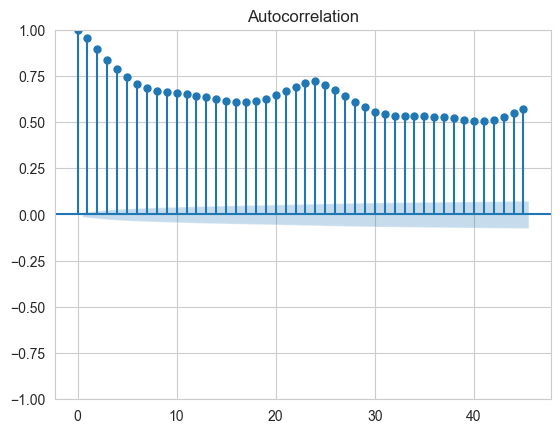

<Figure size 500x300 with 0 Axes>

In [200]:
resids1 = model.resid
plot_acf(resids1)
plt.figure(figsize=(5, 3))
plt.show()

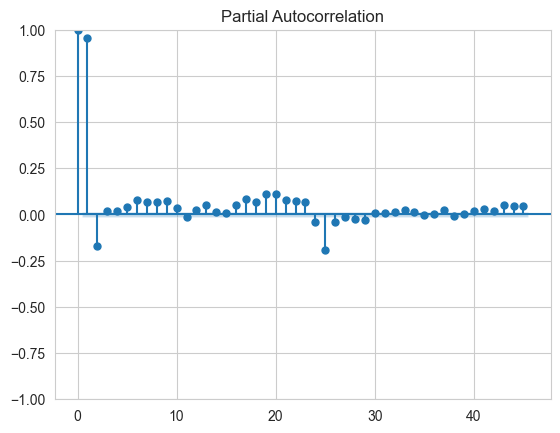

<Figure size 500x300 with 0 Axes>

In [201]:
plot_pacf(resids1)
plt.figure(figsize=(5, 3))
plt.show()

- A lot of correlation in residuals. This means that standard errors are likely wrong. 
- Seasonality can be seen in the data, where seasonality is a form of non-stationarity that can either be modelled or removed. 
- For treatment of non-seasonal dynamics, a few AR terms should be included. The PACF plot indicates that we should at least include the first two lags.

In [202]:
wt_data_copy['DK1_nx_l1'] = wt_data_copy['DK1_nx'].shift(1)
wt_data_copy['DK1_nx_l2'] = wt_data_copy['DK1_nx'].shift(2)
wt_data_copy.dropna(subset=['DK1_nx', 'DK1_nx_l1', 'DK1_nx_l2', 'wind_DK1_l1', 'wind_DK1_l2'], inplace=True)

X = wt_data_copy[['DK1_nx_l1', 'DK1_nx_l2', 'wind_DK1_l1', 'wind_DK1_l2']]
X = sm.add_constant(X)

y = wt_data_copy['DK1_nx']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 DK1_nx   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.750e+05
Date:                Mon, 30 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:54:07   Log-Likelihood:            -1.7097e+05
No. Observations:               26291   AIC:                         3.420e+05
Df Residuals:                   26286   BIC:                         3.420e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          44.7804      2.872     15.593      

- We still have not considered strong seasonality (lagged terms are still hourly) 
- For example, if net export and wind power are both seasonal, they will be correlated. This does not necessarily mean there is a causal relationship, which impacts the results of the regression.

**Next part:** how do prices of carbon permits affect power prices?

In [207]:
import nbformat
import pyperclip

# Path to your notebook file
notebook_path = "Part1.ipynb"

# Load the notebook
with open(notebook_path, "r", encoding="utf-8") as f:
    notebook = nbformat.read(f, as_version=4)

# Extract all cell contents
all_cells = []
for cell in notebook['cells']:
    if cell['cell_type'] == 'code':
        all_cells.append(cell['source'])
    elif cell['cell_type'] == 'markdown':
        all_cells.append(cell['source'])

# Print or save the extracted content
full_text = "\n\n".join(all_cells)

pyperclip.copy(full_text)
print("Notebook content has been copied to the clipboard. You can now paste it using Cmd+V or Ctrl+V.")

Notebook content has been copied to the clipboard. You can now paste it using Cmd+V or Ctrl+V.
